## imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas

In [2]:
df = pd.read_csv(r"C:\Users\ralph\OneDrive\Desktop\Django_rest internship\jupyter-dataanalysis-test\parse\youtube_history.csv")

### data frame infos

In [3]:
print(df.head())
df['watched_on'] = pd.to_datetime(
    df['watched_on'].str.replace("PST","").str.strip(),
    format="%b %d, %Y, %I:%M:%S %p",
    errors='coerce'
)

                                               title      channel  \
0  CHILLERO'T SWABE - AWUT | OFFICIAL MUSIC VIDEO...         AWUT   
1  Terraria 1.4.4.9 download (credits: waxenwgamj...       astxrr   
2  How to COMPLETE FROG UPDATE 99 Nights in the F...    DustPlays   
3  [ROBLOX] Color or Die - Chapter 3 [Full Walkth...       BloxJC   
4        Git, GitHub, & GitHub Desktop for beginners  Coder Coder   

                                           url                    watched_on  
0  https://www.youtube.com/watch?v=VIJk2wKfV9A   Sep 5, 2025, 2:25:04 PM PST  
1  https://www.youtube.com/watch?v=5qibkIUvays  Aug 28, 2025, 1:54:19 AM PST  
2  https://www.youtube.com/watch?v=xuPV04BS3cY  Aug 23, 2025, 9:53:49 AM PST  
3  https://www.youtube.com/watch?v=GiZPF3hbI0E  Jul 27, 2025, 7:31:01 PM PST  
4  https://www.youtube.com/watch?v=8Dd7KRpKeaE  Jul 26, 2025, 2:55:00 AM PST  


### details

In [4]:
df['title'].value_counts()
df['watched_on'] = pd.to_datetime(df['watched_on'], errors='coerce')
df['channel'].value_counts().head(10)
df['title'].value_counts().head(10)
df.groupby(df['watched_on'].dt.to_period("M")).size()

watched_on
2024-06    10
2024-08     5
2024-09     1
2024-10    20
2024-11     3
2025-01     1
2025-02    92
2025-03    54
2025-04     6
2025-05     2
2025-06     7
2025-07     5
2025-08     2
2025-09     1
Freq: M, dtype: int64

### matplotlib + seaborn

# top channel bar chart

C:\Users\ralph\AppData\Local\Temp\ipykernel_16568\2900292319.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels.values, y=top_channels.index, palette="viridis")


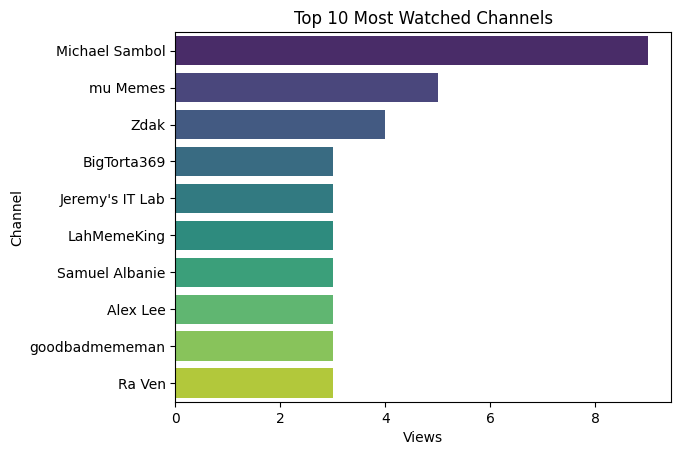

In [5]:
top_channels = df['channel'].value_counts().head(10)

sns.barplot(x=top_channels.values, y=top_channels.index, palette="viridis", orient="h")
plt.title("Top 10 Most Watched Channels")
plt.xlabel("Views")
plt.ylabel("Channel")
plt.show()

# top 10 videos

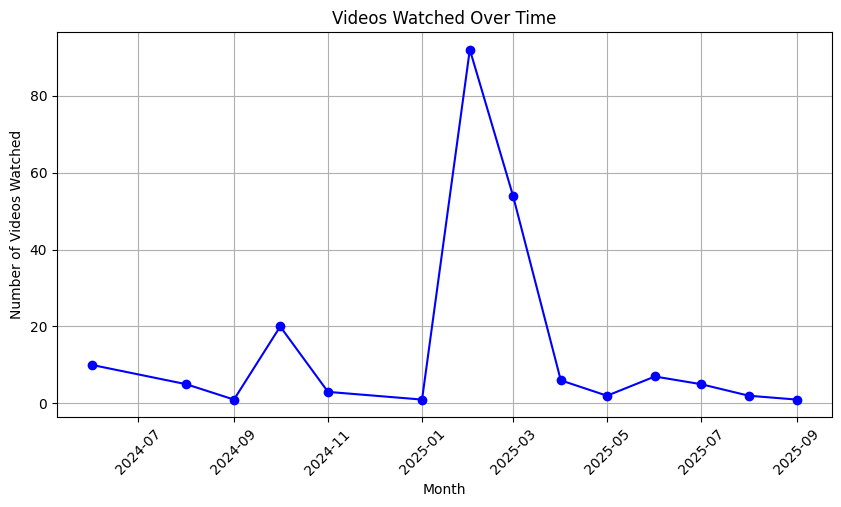

In [11]:
views_per_month = df.groupby(df['watched_on'].dt.to_period("M")).size()
views_per_month.index = views_per_month.index.to_timestamp()

plt.figure(figsize=(10,5))
plt.plot(views_per_month.index, views_per_month.values, marker='o', linestyle='-', color='blue')
plt.title("Videos Watched Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Videos Watched")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# heatmap of activity by month and year (IMPORTANT)

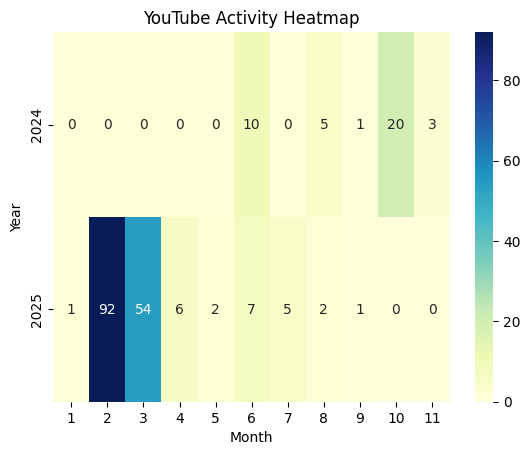

In [7]:
df['month'] = df['watched_on'].dt.month
df['year'] = df['watched_on'].dt.year

activity = df.groupby(['year','month']).size().unstack(fill_value=0)

sns.heatmap(activity, annot=True, fmt="d", cmap="YlGnBu")
plt.title("YouTube Activity Heatmap")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()
